# Summarizing metrics from SDT horiz lines

Leanne Friedrich 5/4/23

## initialization

In [1]:
%load_ext autoreload
%autoreload 2
LOGGERDEFINED = False

In [2]:
import os
import sys
sys.path.append("../")
sys.path.append("../../")
from py.tools.config import cfg
import py.tools.logs as logs
from plainIm import plainIm
import matplotlib.pyplot as plt
import py.metrics.m_plot.m_plots as mp
import py.metrics.m_SDT as me
import regression as rg
import matplotlib.cm as cm
import py.file.file_handling as fh
LOGGERDEFINED = logs.openLog('summary_horiz_SDT.ipynb', LOGGERDEFINED, level='DEBUG', exportLog=False)

## analyzing data

In [7]:
ms = me.summarySDT(os.path.join(cfg.path.fig, 'SDT', 'summaries', 'horizSDTSummaries.csv')
                             , diag=True)

Independents: 
	 meta        :  bn, calibFile, fluFile, printFolder
	                date
	 meta sup    :  sup_base, sup_days, sup_dye, sup_rheModifier, sup_shortname, sup_surfactant, sup_surfactantWt, sup_type, sup_var
	 meta ink    :  ink_base, ink_days, ink_dye, ink_rheModifier, ink_shortname, ink_surfactant, ink_surfactantWt, ink_type, ink_var
	 const       :  GaRatio, GdRatio, gname, GtaRatio, int_Ca, int_CaInv, int_Re, ReRatio, tau0aRatio, tau0dRatio, tGdRatio, viscRatio, vRatio
	                dEst, hDragP, pressureCh0, rGrava, rGravd, sigma, spacing, vDragP, zdepth
	 const sup   :  sup_Bma, sup_Bmd, sup_Ca, sup_CaInv, sup_diluent, sup_diluentWt, sup_dnorma, sup_dnormd, sup_dnormInva, sup_dnormInvd, sup_Oh, sup_OhInv, sup_Re, sup_We, sup_WeInv
	                sup_density, sup_dPRa, sup_dPRd, sup_eta0a, sup_eta0d, sup_Gstora, sup_Gstord, sup_rate, sup_tau0a, sup_tau0d, sup_v, sup_val, sup_visc0
	 const ink   :  ink_Bma, ink_Bmd, ink_Ca, ink_CaInv, ink_diluent, ink_diluentWt, in

,1,2,3
wp,X_w1p,X_w2p,X_w3p
wo,X_w1o,X_w2o,X_w3o
dw/dt,dXdt_w1o,dXdt_w2o,dXdt_w3o
wrelax,delta_X_w1relax,delta_X_w2relax,delta_X_w3relax
write,delta_X_write1,delta_X_write2,
dp,X_d1p,X_d2p,
do,X_d1o,X_d2o,
dd/dt,dXdt_d1o,dXdt_d2o,
drelax,delta_X_d1relax,delta_X_d2relax,
disturb,delta_X_disturb1,delta_X_disturb2,


In [13]:
ms.keyTableVar('segments')

,1,2,3
wp,,,
wo,segments_w1o,segments_w2o,segments_w3o
wrelax,delta_segments_w1relax,delta_segments_w2relax,delta_segments_w3relax
write,,delta_segments_write2,
dp,,,
do,segments_d1o,segments_d2o,
drelax,delta_segments_d1relax,delta_segments_d2relax,
disturb,delta_segments_disturb1,delta_segments_disturb2,


In [7]:
ms.ss.ink_base.unique()

array(['PDMS_3', 'silicone oil'], dtype=object)

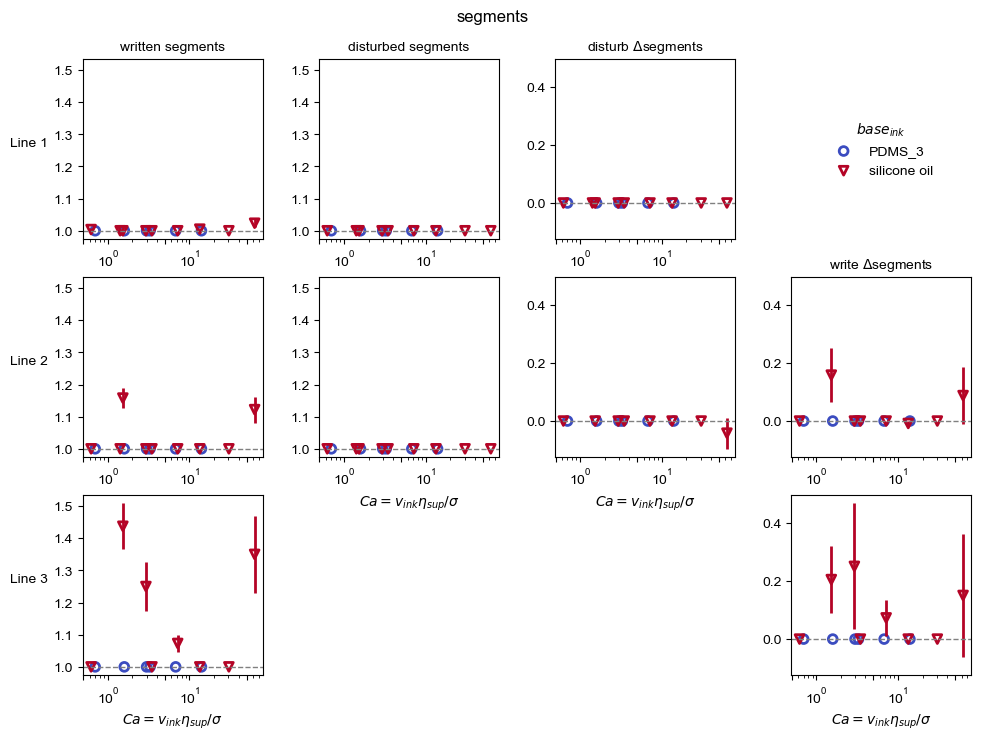

In [26]:
yvl = mp.yvarlines(ms, ms.ss[(ms.ss.date>230214)&(ms.ss.spacing==0.500)], xvar='int_Ca', yvar='segments', zvar='ink_base', llist=[1, 2, 3]
             , plist=['wo', 'do', 'disturb', 'write'], plotType='notebook', yideal=me.ideals()
                   , logx=True, logy=False, mode='scatter', dx=0)

In [29]:
ms.reduceRows('segments_w2o', ms.ss.spacing==0.500, yvarmin=1);

,ink_shortname,sup_shortname,int_Ca,spacing,segments_w2o
334,SO10,4.0,2.93,0.5,1.06
607,SO7-S20-0.5,4.0,62.72,0.5,1.25
786,SO9-S85-0.05,3.0,1.53,0.5,1.75
269,SO10,3.0,0.62,0.5,1.84
613,SO7-S20-0.5,4.0,62.72,0.5,2.00


In [30]:
ms.openFolder(613)

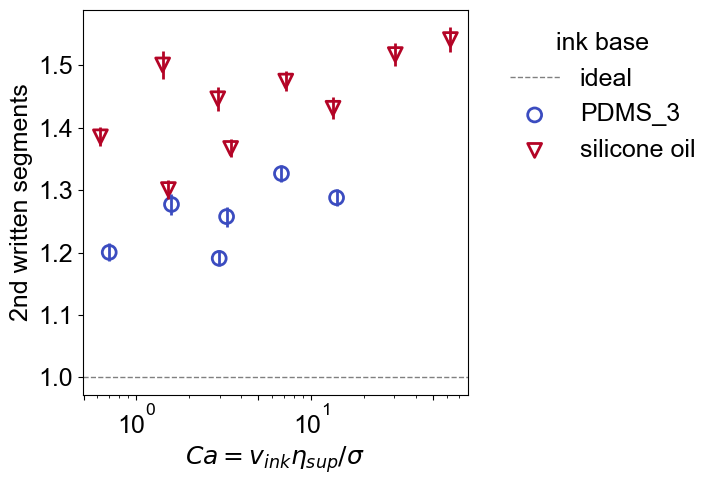

In [19]:
xvar = 'int_Ca'
yvar = 'segments_w2o'
# yvl = mp.scatterPlot(ms, ms.ss[ms.ss.spacing==1.250], xvar=xvar, yvar=yvar, zvar='ink_surfactantWt', llist=[1]
#              , plist=['wo'], plotType='ppt', yideal=me.ideals().yideal(yvar)
#                    , logx=True, logy=False, mode='scatter', dx=0, figsize=(5,5))
yvl = mp.scatterPlot(ms, ms.ss[(ms.ss.date>230214)], xvar=xvar, yvar=yvar, zvar='ink_base', llist=[1]
             , plist=['wo'], plotType='ppt', yideal=me.ideals().yideal(yvar)
                   , logx=True, logy=False, mode='scatter', dx=0, figsize=(5,5))
# yvl.export(os.path.join(cfg.path.fig, r'SDT\images\plots', f'{xvar}_{yvar}.png'))

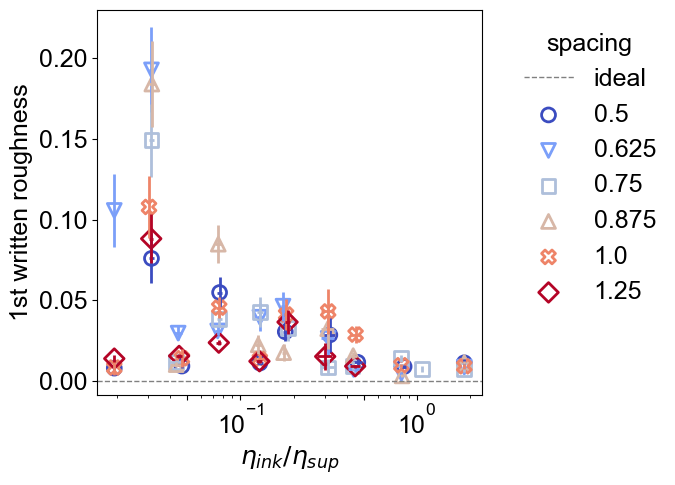

In [8]:
xvar = 'visc0Ratio'
yvar = 'roughness_w1o'
# yvl = mp.scatterPlot(ms, ms.ss[ms.ss.spacing==1.250], xvar=xvar, yvar=yvar, zvar='ink_surfactantWt', llist=[1]
#              , plist=['wo'], plotType='ppt', yideal=me.ideals().yideal(yvar)
#                    , logx=True, logy=False, mode='scatter', dx=0, figsize=(5,5))
yvl = mp.scatterPlot(ms, ms.ss[(ms.ss.date>230214)&(ms.ss.meanT_w1o>=0.9)], xvar=xvar, yvar=yvar, zvar='spacing', llist=[1]
             , plist=['wo'], plotType='ppt', yideal=me.ideals().yideal(yvar)
                   , logx=True, logy=False, mode='scatter', dx=0.1, figsize=(5,5))
# yvl.export(os.path.join(cfg.path.fig, r'SDT\images\plots', f'{xvar}_{yvar}.png'))

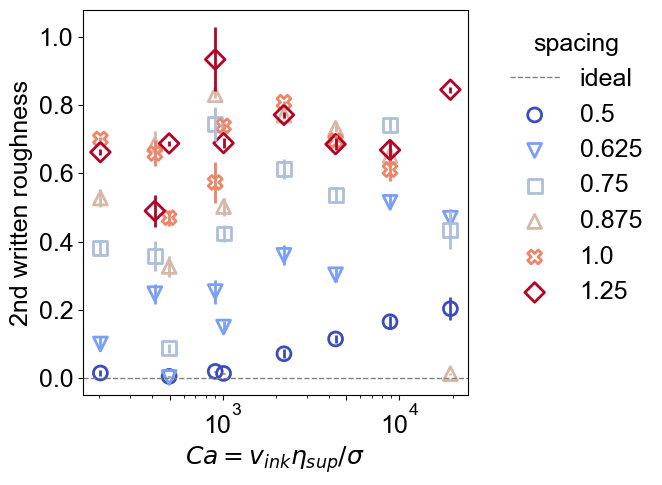

In [89]:
xvar = 'int_Ca'
yvar = 'roughness_w2o'
# yvl = mp.scatterPlot(ms, ms.ss[ms.ss.spacing==1.250], xvar=xvar, yvar=yvar, zvar='ink_surfactantWt', llist=[1]
#              , plist=['wo'], plotType='ppt', yideal=me.ideals().yideal(yvar)
#                    , logx=True, logy=False, mode='scatter', dx=0, figsize=(5,5))
yvl = mp.scatterPlot(ms, ms.ss[(ms.ss.date>230214)&(ms.ss.meanT_w1o>=0.9)], xvar=xvar, yvar=yvar, zvar='spacing', llist=[1]
             , plist=['wo'], plotType='ppt', yideal=me.ideals().yideal(yvar)
                   , logx=True, logy=False, mode='scatter', dx=0, figsize=(5,5))
# yvl.export(os.path.join(cfg.path.fig, r'SDT\images\plots', f'{xvar}_{yvar}.png'))

In [97]:
ms.openFolder(217)

In [327]:
ms.openFolder(389)

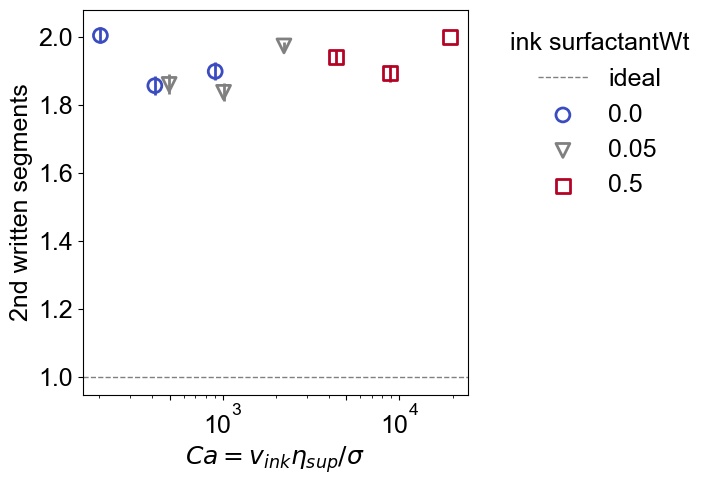

In [95]:
xvar = 'int_Ca'
yvar = 'segments_w2o'
spacing = 1.25
# yvl = mp.scatterPlot(ms, ms.ss[ms.ss.spacing==1.250], xvar=xvar, yvar=yvar, zvar='ink_surfactantWt', llist=[1]
#              , plist=['wo'], plotType='ppt', yideal=me.ideals().yideal(yvar)
#                    , logx=True, logy=False, mode='scatter', dx=0, figsize=(5,5))
yvl = mp.scatterPlot(ms, ms.ss[(ms.ss.spacing==spacing)], xvar=xvar, yvar=yvar, zvar='ink_surfactantWt', llist=[1]
             , plist=['wo'], plotType='ppt', yideal=me.ideals().yideal(yvar)
                   , logx=True, logy=False, mode='scatter', dx=0, figsize=(5,5))
# yvl.export(os.path.join(cfg.path.fig, r'SDT\images\plots', f'{xvar}_{yvar}_{spacing}.png'))

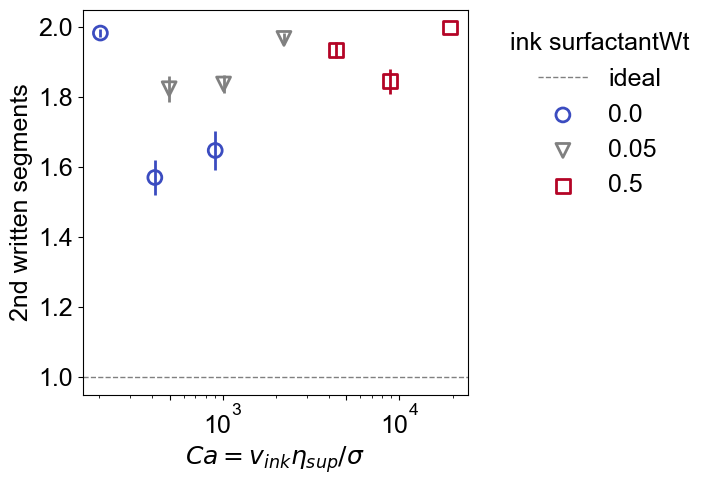

In [93]:
xvar = 'int_Ca'
yvar = 'segments_w2o'
spacing = 1.25
# yvl = mp.scatterPlot(ms, ms.ss[ms.ss.spacing==1.250], xvar=xvar, yvar=yvar, zvar='ink_surfactantWt', llist=[1]
#              , plist=['wo'], plotType='ppt', yideal=me.ideals().yideal(yvar)
#                    , logx=True, logy=False, mode='scatter', dx=0, figsize=(5,5))
yvl = mp.scatterPlot(ms, ms.ss[(ms.ss.spacing==spacing)&(ms.ss.date>230214)&(ms.ss.meanT_w1o>=0.9)], xvar=xvar, yvar=yvar, zvar='ink_surfactantWt', llist=[1]
             , plist=['wo'], plotType='ppt', yideal=me.ideals().yideal(yvar)
                   , logx=True, logy=False, mode='scatter', dx=0, figsize=(5,5))
# yvl.export(os.path.join(cfg.path.fig, r'SDT\images\plots', f'{xvar}_{yvar}_{spacing}.png'))

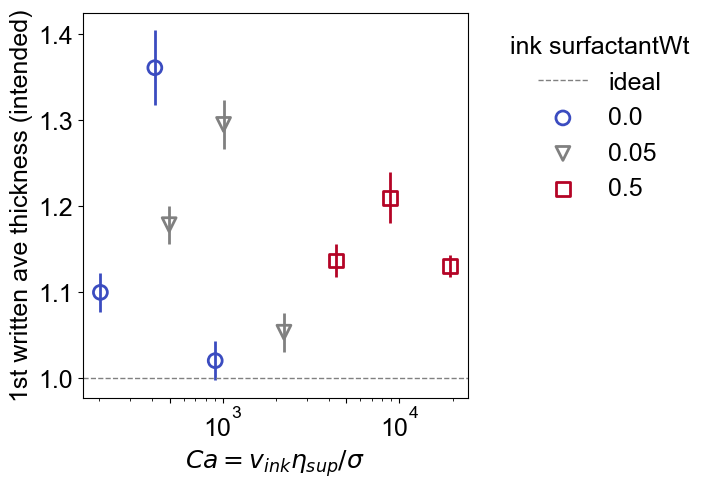

In [85]:
xvar = 'int_Ca'
yvar = 'meanT_w1o'
spacing = 0.5
# yvl = mp.scatterPlot(ms, ms.ss[ms.ss.spacing==1.250], xvar=xvar, yvar=yvar, zvar='ink_surfactantWt', llist=[1]
#              , plist=['wo'], plotType='ppt', yideal=me.ideals().yideal(yvar)
#                    , logx=True, logy=False, mode='scatter', dx=0, figsize=(5,5))
yvl = mp.scatterPlot(ms, ms.ss[(ms.ss.spacing==spacing)&(ms.ss.date>230214)], xvar=xvar, yvar=yvar, zvar='ink_surfactantWt', llist=[1]
             , plist=['wo'], plotType='ppt', yideal=me.ideals().yideal(yvar)
                   , logx=True, logy=False, mode='scatter', dx=0, figsize=(5,5))
# yvl.export(os.path.join(cfg.path.fig, r'SDT\images\plots', f'{xvar}_{yvar}_{spacing}.png'))

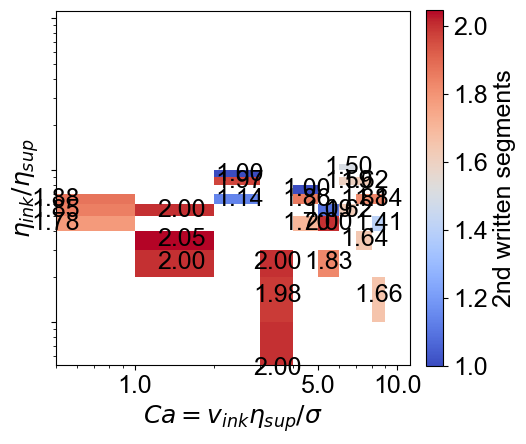

In [278]:
xvar = 'int_Ca'
yvar = 'segments_w2o'
spacing = 0.875
# yvl = mp.scatterPlot(ms, ms.ss[ms.ss.spacing==1.250], xvar=xvar, yvar=yvar, zvar='ink_surfactantWt', llist=[1]
#              , plist=['wo'], plotType='ppt', yideal=me.ideals().yideal(yvar)
#                    , logx=True, logy=False, mode='scatter', dx=0, figsize=(5,5))
yvl = mp.meshPlot(ms, ms.ss[(ms.ss.spacing==spacing)], xvar=xvar, zvar=yvar, yvar='viscRatio', llist=[1]
             , plist=['wo'], plotType='ppt', yideal=me.ideals().yideal(yvar), gradColor=mp.colorModes.discreteZvar
                   , logx=True, logy=True, mode='scatter', dx=0, figsize=(5,5))
# yvl.export(os.path.join(cfg.path.fig, r'SDT\images\plots', f'{xvar}_{yvar}_{spacing}.png'))

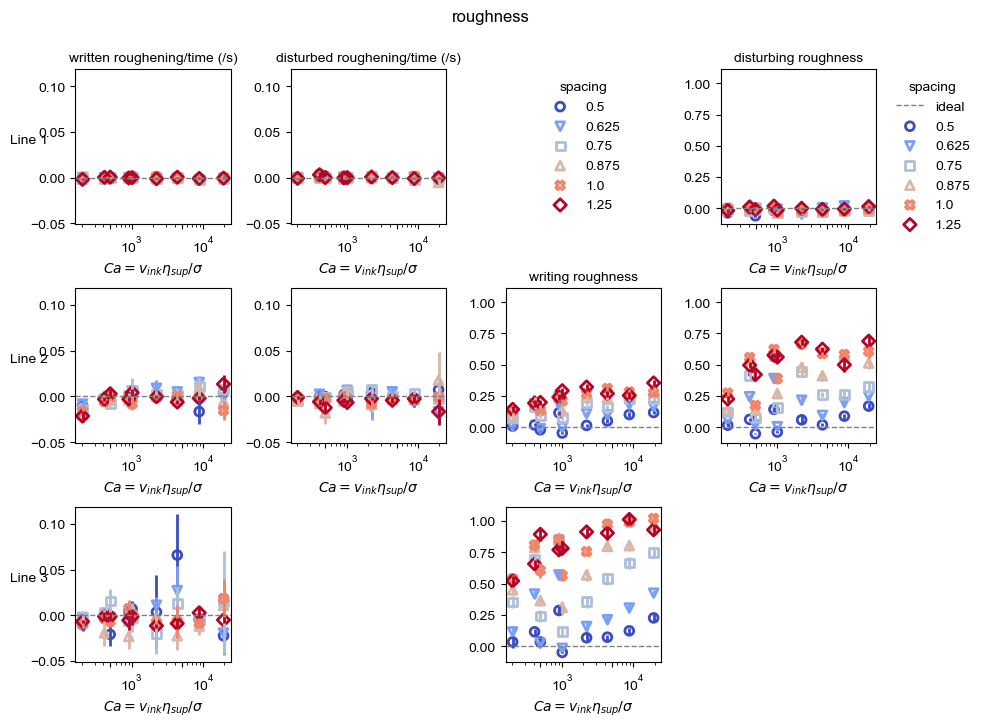

In [42]:
yvl = mp.yvarlines(ms, ms.ss, xvar='int_Ca', yvar='roughness', zvar='spacing', llist=[1, 2, 3]
             , plist=['dwdt', 'dddt', 'wp', 'dp'], plotType='notebook', yideal=me.ideals()
                   , logx=True, logy=False, mode='scatter', dx=0)

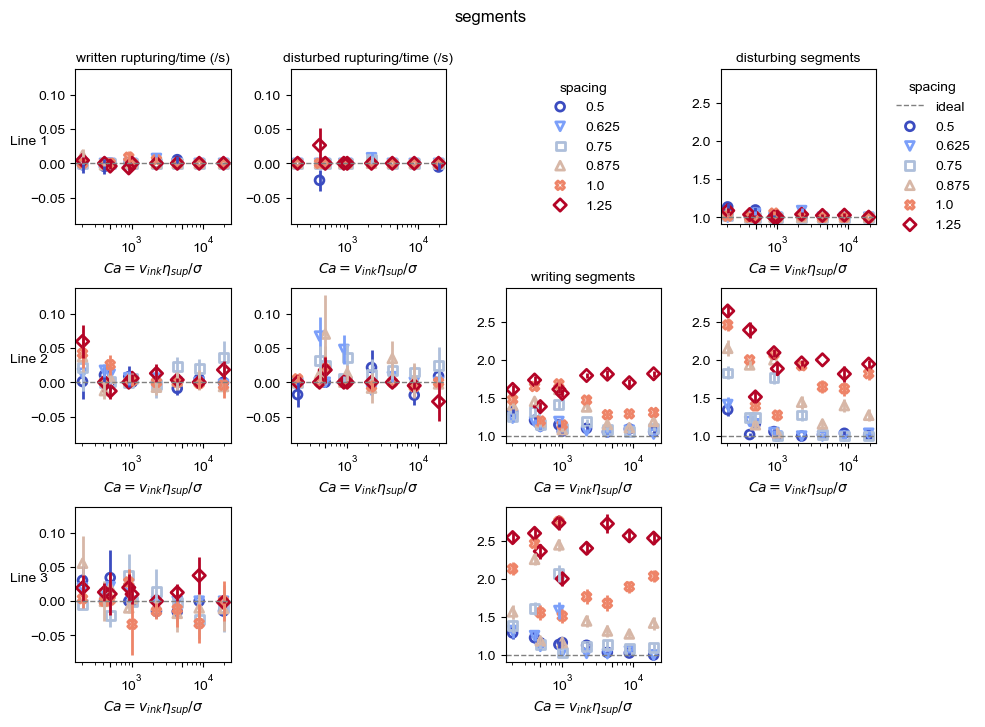

In [22]:
yvl = mp.yvarlines(ms, ms.ss, xvar='int_Ca', yvar='segments', zvar='spacing', llist=[1, 2, 3]
             , plist=['dwdt', 'dddt', 'wp', 'dp'], plotType='notebook', yideal=me.ideals()
                   , logx=True, logy=False, mode='scatter', dx=0)

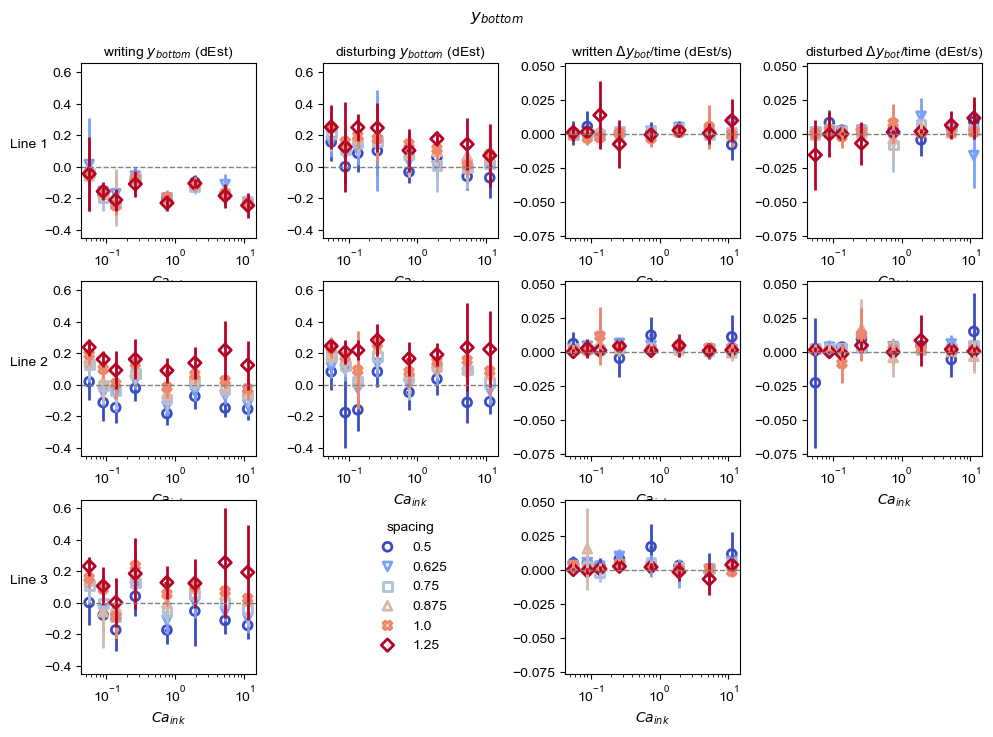

In [9]:
yvl = mp.yvarlines(ms, ms.ss, xvar='ink_Ca', yvar='yBot', zvar='spacing', llist=[1, 2, 3]
             , plist=['wp', 'dp', 'dwdt', 'dddt'], plotType='notebook', yideal=me.ideals()
                   , logx=True, mode='scatter')

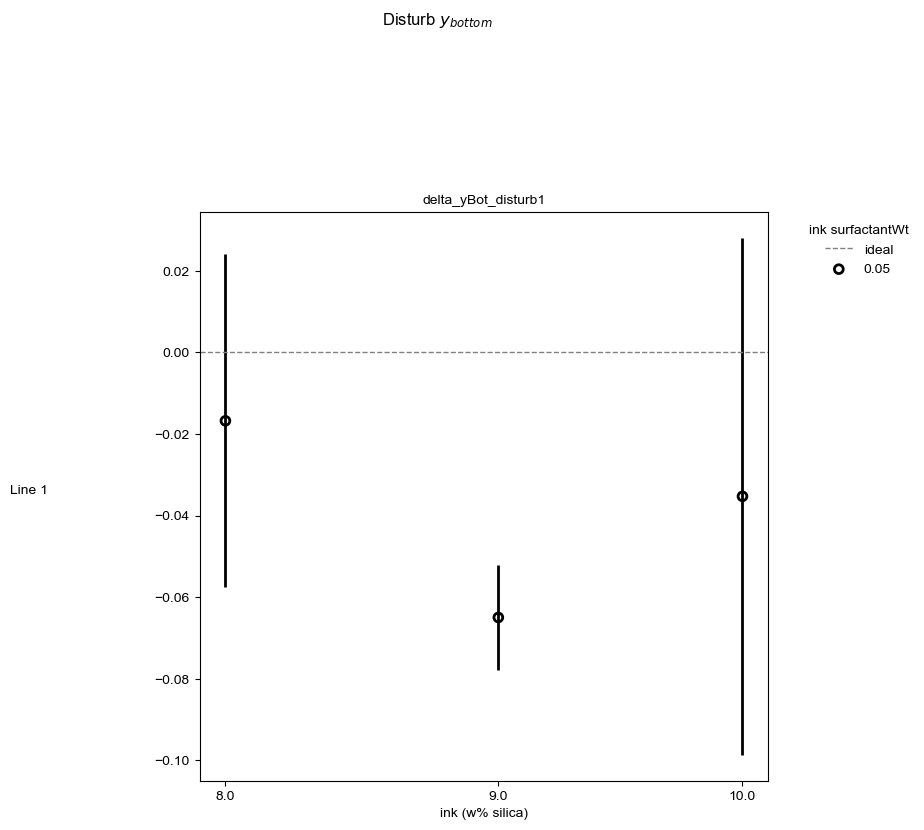

In [80]:
yvl = mp.yvarlines(ms, ms.ss[(ms.ss.sup_Ca<100)&(ms.ss.sup_Ca>50)], xvar='ink_val', yvar='yBot', zvar='ink_surfactantWt', llist=[1]
             , plist=[ 'disturb'], plotType='notebook', yideal=me.ideals()
                   , logx=True, logy=False, mode='scatter', dx=0)

In [31]:
yvar = 'dwdt_d2o'
# rows = ms.ss[(ms.ss[yvar]>0.1)&(ms.ss.spacing==1.25)]
rows = ms.ss[(ms.ss[yvar]>0.2)]
# rows = ms.ss[ms.ss[yvar]>0]
rows[['ink_shortname','sup_shortname', 'int_Ca', 'spacing', yvar]]

,ink_shortname,sup_shortname,int_Ca,spacing,dwdt_d2o
133,SO9,3.5,412.9806,0.500,0.4913
478,SO9-S85-0.05,4.0,2220.7424,0.875,0.3111


In [34]:
fh.openExplorer(rows.loc[133]['printFolder'])

In [75]:
for i in [261]:
    folder = rows.loc[i]['printFolder']
    fv = me.folderHorizSDT(folder, overwriteMeasure=True, overwriteSummary=True, diag=0, overrideSegment=True, overwriteCropLocs=False)
    fv.measureFolder();
    fv.summarize();

Exported disturbHoriz3_2_0.625_Usegment_HOh2_l0d2o1_I_SO7-S20-0.5_S_4.00_230509_175521_9.png
Exported disturbHoriz3_2_0.625_Usegment_HOh2_l0d2o1_I_SO7-S20-0.5_S_4.00_230509_175521_9.png
Exported disturbHoriz3_2_0.625_Usegment_HOh2_l0d2o2_I_SO7-S20-0.5_S_4.00_230509_175521_9.png
Exported disturbHoriz3_2_0.625_Usegment_HOh2_l0d2o2_I_SO7-S20-0.5_S_4.00_230509_175521_9.png
Exported disturbHoriz3_2_0.625_Usegment_HOh2_l0d2o3_I_SO7-S20-0.5_S_4.00_230509_175521_9.png
Exported disturbHoriz3_2_0.625_Usegment_HOh2_l0d2o3_I_SO7-S20-0.5_S_4.00_230509_175521_9.png
Exported disturbHoriz3_2_0.625_Usegment_HOh2_l0d2o4_I_SO7-S20-0.5_S_4.00_230509_175521_9.png
Exported disturbHoriz3_2_0.625_Usegment_HOh2_l0d2o4_I_SO7-S20-0.5_S_4.00_230509_175521_9.png
Exported disturbHoriz3_2_0.625_Usegment_HOh2_l0d2o5_I_SO7-S20-0.5_S_4.00_230509_175521_9.png
Exported disturbHoriz3_2_0.625_Usegment_HOh2_l0d2o6_I_SO7-S20-0.5_S_4.00_230509_175521_9.png
Exported disturbHoriz3_2_0.625_Usegment_HOh2_l0d2o6_I_SO7-S20-0.5_S_4.

In [101]:
rgt = mp.regressionTableSDT(ms, ms.ss[ms.ss.spacing==0.875], 'segments_w2o', logy=False, printOut=True, export=False, package='tabular')

\begin{table}[H]
\centering
\caption[Linear regressions for 2nd written segments at nonzero surface tension.]{Table of linear regressions of log-scaled x variables and Spearman rank correlations for \textbf{2nd written segments} at nonzero surface tension. For example, ${Re}_{ink}$ indicates a regression fit to $y = b*log_{10}(Re_{ink}) + c$. A Spearman rank correlation coefficient of -1 or 1 indicates a strong correlation. Variables are defined in table \ref{tab:variableDefs}.}
\label{tab:segments_w2oRegNonZero}
\begin{tabular}{llrrll}
                                         variables &       $r^2$ &     b &     c & Spearman coeff &     Spearman p \\
                       $G'_{ink.a}/\tau_{y.sup.a}$ &        0.13 & -0.40 &  1.98 &          -0.36 &        8.4e-03 \\
                         $\tau_{ink.d}/G'_{sup.d}$ &        0.18 & -0.45 &  0.02 &          -0.42 &        1.8e-03 \\
                           $G'_{ink.a}/G'_{sup.a}$ &        0.15 & -0.43 &  1.47 &          -0.38 &    